
## Continuous Random Variables


### Objectives:
The primary objective of this tutorial is to better understand continuous random variables and their probability density functions.The second is to expand on our skills of simulating data corresponding to real-world experimental situations. 

### Learning Goals:

* Understanding the difference between discrete and continuous random processes
* Understanding continuous probability density functions
* Simulating continuous random processes
* Computing probabilities from probability density functions

### From Discrete to Continuous

Last time, we explored *discrete* random variables – variables that can only take on a certain finite number of values. This occurs when, for example, we are *counting* things, because counts can only be integers, and nobody actually counts anything to infinity.

#### A discrete example

Sometimes we might measure something and put it into a category based on the measurement. For example, people who fish must measure each fish they catch and determine if it is "too small" or "not too small"; if it's "not too small", then they get to keep it, if it is too small, then they must release it. That's a discrete (binomial) variable. In fact, if we knew the distribution of fish sizes in the water, we could easily predict how often we would catch a fish we could keep.

Somebody who's really into fishing might make up more categories, like "minnow", "little", "okay", "big", and "monster". Over time, the fisherperson would get a general idea in their head of how often each type of fish was caught. Or they might even keep a tally in a notebook of how much of each size of fish was caught. Let's say they kept a tally and, after they had caught a total of 10,000 fish over the years, the distribution of fish sizes looked like the one we're about to simulate.

As always, let's import our libraries.

In [1]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

And now do the fishing.

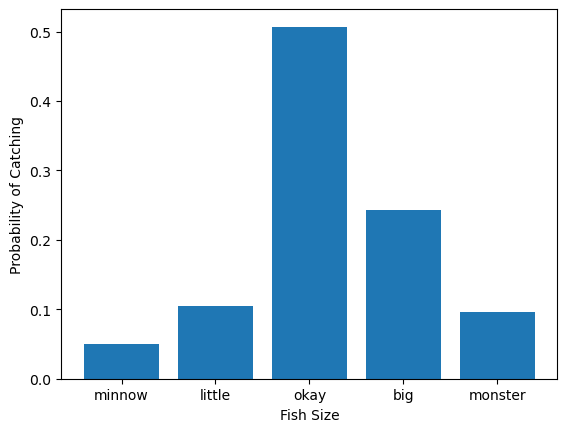

In [2]:

rnd.seed(42) # Set the seed

n = 10000 # Set the number of samples – a lot of fishing!!

size_categories = ['minnow', 'little', 'okay', 'big', 'monster']  # fish categories
size_probabilities = [0.05, 0.1, 0.5, 0.25, 0.1]                  # fish probabilities
counts = np.zeros(len(size_categories))                           # array to hold the counts

sizes = rnd.choice(size_categories, size=n, p=size_probabilities) # go fishing!

for i in size_categories :
    counts[size_categories.index(i)] = np.sum(sizes == i)         # count the fish

fish_probabilities = counts/n                                     # calculate the probabilities


plt.bar(size_categories, fish_probabilities)                      # Plot the histogram
plt.xlabel('Fish Size')
plt.ylabel('Probability of Catching')
plt.show()

This is a ***discrete probability distribution***. What that means is we can look at any one category, like "big", and see that there is about a – what? – 24% chance of catching a "big" fish. If these categories cover all sizes of fish, then the probability of catching *any* of these fish should sum to 1.

In [3]:
print(f"The sum of the probabilities is {np.sum(fish_probabilities):.2f}")

The sum of the probabilities is 1.00


And there we have it. Discrete probability distribution are easy peasy. The height of the function for any category gives the probability that a random observation will be in that category.

#### A continuous example

While our fisherperson above formed discrete categories for the size of fish, a wildlife biologist or a state game warden would actually *measure* the fish. The length of the fish is ***continuous*** variable. One way to think of a continuous variable is a variable that, when given two values, you can always come up with the third value between them. So if one fish was 45.005 cm long, and another was 45.006 cm long, then it's possible to have a fish that is 45.0055 cm long. And you can play this game out to as many decimal places you wish. With a discreet variable, this is not true; there is nothing between "big" and "monster".

*Note: Some variables, like counts, are inherently discrete (like when we count different kinds of things). Other variables, like fish length, can be categorized into a discrete variable, like our fisherperson did above, even though they are ultimately continuous. Whether to treat a continuous variable as discrete is sometimes a good idea, sometimes not. It's very situation dependent.*


Here's a distribution of fish lengths (in cm) that might be measured by a biologist:

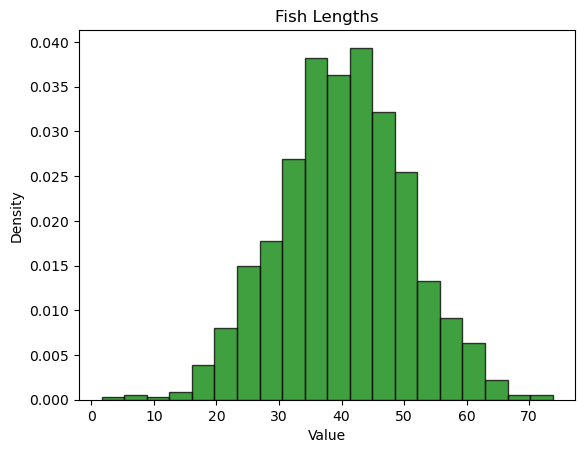

In [4]:
# Simulate a continuous random variable 
n_measurements = 1000 
ave_fish_length = 40
std_fish_length = 10

fish_lengths = rnd.normal(ave_fish_length, std_fish_length, size=n_measurements)

# Plot the results in a histogram
plt.hist(fish_lengths, bins=20, density=True, 
         color='g', alpha=0.75, edgecolor='k')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Fish Lengths')
plt.show()


This histogram looks like a finer-grained version of our fisherperson's. In some sense it is, but in some sense it isn't. Notice the values on the y-axis. Does it looks like they sum to 1? If we take the highest value, which looks like it's maybe 0.042, and mutiply it by the number bins (20), what would we get?

---

Do that multiplication in the cell below.

So, no, and since most of the y-axis values are much smaller, these y values definitely do not sum to anything close to 1. 

---

Let's actually do the sum. To do this, we'll use the `np.histogram()` function with the exact same arguments that we used to plot the histogram, and this will give us the y-axis values that we can sum.

In [5]:
fish_densities, fish_bins = np.histogram(fish_lengths, bins=20, density=True)
density_sum = np.sum(fish_densities)
print(f"The sum of the densities is {density_sum:.2f}")

The sum of the densities is 0.28


So, again, nowhere near 1.

---

So what are these y-values? They are ***probability densities***. To get actual probabilities, we have to ***integrate*** the probability density function.

The reason comes down to this: with a continuous variable, the probability of any one ***exact*** number occurring to an infinite number of decimal places is, in the limit, 0. So, for example, what are the chances of catching a fish that is exactly 41.967363647t8909483798365836256263748 cm long? Very very very small – in the limit (imagine adding infinitely more decimal places), 0. 

But what ***can*** do, thanks to calculus, is compute the probability of catching a fish over some *interval* of lengths. In other words we can compute, for example, the probability of catching a fish

* bigger than 40cm.
* smaller than 25cm.
* between 30 and 50cm.
* and etcetera...

Do a quick thought experiment in your head: given the distribution of fish lengths above, what would be the probability of catching a fish that was somewhere between 0 and 100 cm in length?

It would have to be 1.0, right? So ***something*** has to sum to 1.0! But what?

What sums to 1 is the ***area*** (or "probability mass") of the distribution. Recall that the integral of a function is
$$
\int_{}{} {f(x)\delta x}
$$
Well, in this case, $f(x)$ is the sequence of the heights of the bars – the probability densities – and the $\delta x$ values are just the bin widths. So we can compute area of our distribution by summing the product of the heights and widths of the bars:

In [6]:
probs_sum = np.sum(fish_densities * np.diff(fish_bins))
print(f"The area of the distribution is {probs_sum:.2f}")

The area of the distribution is 1.00


***Voila!!!*** So to compute probabilities of things for ***continuous*** variables, we need know the ***probability density function***, or have an emperical estimate of it, and then compute ***areas under the function***, because it's the areas under the function that correspond to the probabilities of things happening.

### Computing Probabilities 



There's a few different ways we can go about estimating probabilities of things when we have a set of data.

#### Computing Probabilities by Counting

Conceptually, the easiest way to estimate a probability is to count the number of observations in the interval of interest, and then divide by the total number of observations. 

So, for example, given the above fish data, what's the probability of catching a fish bigger than 40 cm? To do that, will just count up the number of fish more than 40 cm long, and divide it by the total number of fish:

In [7]:
fish_over = np.sum(fish_lengths > 40)
p_fish_over = fish_over / n_measurements
print(f"The probability of catching a fish over 40 cm is {p_fish_over:.2f}")

The probability of catching a fish over 40 cm is 0.51


Now let's make a plot to illustrate that probability. First, we'll use `np.histogram()` to get the relevant stuff for plotting. (We're not going to use `plt.hist()` to plot, we're going to use `plt.bar` with the data from `np.histogram()` because that will make it easier for us to overlay plots.

In [8]:
# Get the histogram bins and counts
counts, bins = np.histogram(fish_lengths, bins=20) # Get the histogram bin edges and counts
bin_width = bins[1] - bins[0]                      # Get the bin width
bin_centers = bins[:-1] + bin_width/2              # Get the bin centers


Now let's make a plot showing the probability of getting a fish more than 40 cm long.

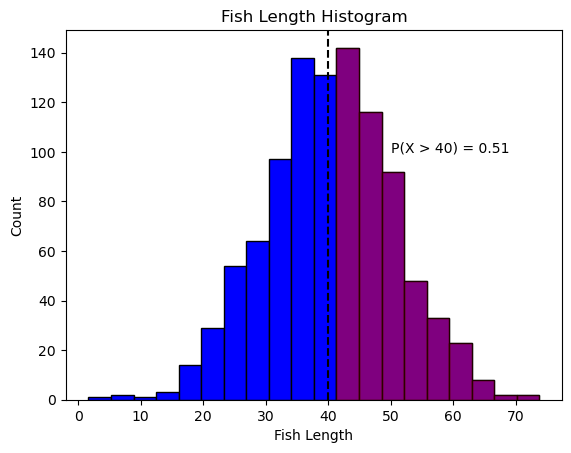

In [9]:

# Set the threshold
threshold = 40

# Plot the histogram with different colors for bars above and below the threshold
plt.bar(bin_centers, counts, 
        width=bin_width, color='b', edgecolor='k')
plt.bar(bin_centers[bin_centers > threshold], counts[bin_centers > threshold], 
        width=bin_width, color='r', edgecolor='k', alpha=0.5)

# Add a vertical line for the threshold
plt.axvline(x=threshold, color='k', linestyle='--')

plt.xlabel('Fish Length')
plt.ylabel('Count')
plt.title('Fish Length Histogram')
plt.text(50, 100, f'P(X > {threshold}) = {p_fish_over:.2f}')
plt.show()

---

Getting those bin centers and widths along with the counts was so darn useful, we should make it a function! Do so in the code cell below; the function should take the data and the number of bins as input, and return the counts, bin centers, and bin widths.

In [10]:
def hist_data(data, n_bins) :
    """
    Computes the histogram counts, bin centers, and bin_widths
    from the data and number of bins
    """
    # your code here

Now test your function:

In [ ]:
c, bc, bw = hist_data(fish_lengths, 20)
print(f"The bin centers are {bc}")
print(f"The bin widths are {bw}")
print(f"The counts are {c}")

---

Now, make plots like those above for 

* fish shorter than 20 cm
* fish longer than 60 cm
* fish between 30 and 50 cm in length

Shorter than 20:

Longer than 60:

Between 30 and 50 cm:

---

#### Computing Probabilities using the Emperical Cumulative Density Function

So far, we've learned about 4 powerful Python packages for doing data science. They are:

* `pandas`
* `seaborn`
* `numpy`
* `matplotlib`

We are now going to meet a 5th package, `scipy`. For now, we're going to use some of its statistical functions, which are in `scipy.stats`. So let's import that.

In [10]:
import scipy.stats as stats # Import the stats module using conventional alias

##### Money paid for a new car of a certain brand.

If you work for a car manufacturer, somebody in that company is going be tasked with analyzing how much money people are willing to pay for each model of car, which depends on trim level, dealer add-ons, different taxes and fees in different states... whatever...

Note that, technically, sales price is a discrete variable because it has a minimum discrete unit, the penny. But since the penny is so small compared to the price of the car, this is a case in which it's easier to treat price as a continuous variable.

So let's simulate some sales data to work with:

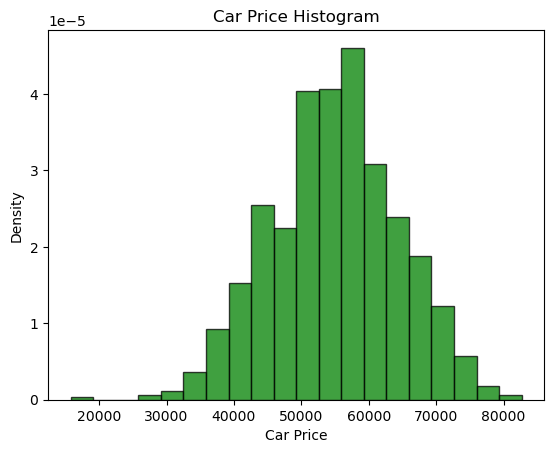

In [11]:

# Parameters for the normal distribution
mean_price = 55000
std_dev_price = 10000

# Generate normally distributed data
car_prices = np.random.normal(mean_price, std_dev_price, 1000)

# Plot the histogram
plt.hist(car_prices, bins=20, density=True, 
         color='g', alpha=0.75, edgecolor='k')
plt.xlabel('Car Price')
plt.ylabel('Density')
plt.title('Car Price Histogram')
plt.show()

Now, given these data, let's let `scipy.stats` compute the integral (or cumulative sum) for us. This integral, or cumulative sum of the probabilities of data values is called the ***empirical cumulative distribution function*** (ECDF). We compute it using the `stats.ecdf()` method.

In [12]:

# Compute ecdf
car_ecdf = stats.ecdf(car_prices)

AttributeError: module 'scipy.stats' has no attribute 'ecdf'

---

(If you get a "AttributeError: module 'scipy.stats' has no attribute 'ecdf'" message, then update scipy
`conda update scipy=1.11.3)`

If that doesn't work, just read this section and then start running code again in Computing Probabilities Using Theoretical Density Functions

---

The `stats.ecdf()` method is pretty cool. you can see what it can do [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ecdf.html). We can look at it by plotting its "quantiles" (the x axis values corresponding to a given probability) against the probabilities:

In [ ]:

plt.plot(car_ecdf.cdf.quantiles, car_ecdf.cdf.probabilities, marker='.', linestyle='none')
plt.xlabel('Car Price')
plt.ylabel('ECDF')
plt.title('Car Price ECDF')
plt.show()

This shows, at each point on the x axis, how much of the histogram of is to the right of that point. In other words, what proportion of people were willing to pay up to that price.

Does this plot look right? Let's do some reality checks. Looking at the histogram, no cars sold for less than about 25,000. And, sure enough, the ECDF is 0 at 25,000. The most expensive car sold was 90,000 and, sure enough again, the ECDF shows that the probability that people paid less than 90,000 is 1.0.

We can use the `evaluate()` method to get the area under the histogram of any value we want. So, for example, so see what proportion of people paid less than $50,000 for a car, we just do:

In [ ]:
price_threshold = 50000
p_lower = car_ecdf.cdf.evaluate(price_threshold)
print(f"The probability of a car costing less than ${price_threshold} is {p_lower:.2f}")

If we want to see how many people were willing to pay more than $65,000 for a car, we do:

In [ ]:
price_threshold = 65000
p_over = 1 - car_ecdf.cdf.evaluate(price_threshold)
print(f"The probability of somebody paying more than ${price_threshold} is {p_over:.2f}")

---

Use the ECDF method to compute how many people are willing to pay between $40,000 and $60,000 for a car.

Now plot a histogram of the car prices with some vertical lines and shading to highlight this price region. Hint: follow the example used in the fish data above (inluding your awesome function to comopute bin centers, etc.) to do this.

---

#### Computing Probabilities Using Theoretical Density Functions

So far, we've used two methods to calculate probabilities of things:

* counting the observations less than some threshold, and dividing by the number of observations
* using `scipy.stats.ecdf()` to compute the cumulative sum (discrete integral) of our data, and use that as a look-up-table to get probabilities.

However, if we're pretty sure that our data come from a known distribution, such as a Gaussian distribution, we can gain a little more precision by fitting a truly continuous distribution to our data, and using that distribution to compute probabilities.

##### Time spent on a company's website
Let's say we are tasked with evaluating how much time people spend on our company's website. Let's say the data we have from 10,000 website visits are these:

In [ ]:
# Parameters for the normal distribution
rnd.seed(42) # Set the seed so we all get the same results
time_mean = 334.6   # mean seconds spent on the website
time_std_dev = 31.2 # standard deviation of seconds spent on the website
n_visitors = 10000 # number of visitors to the website

# Generate random numbers from a normal distribution
data = np.random.normal(time_mean, time_std_dev, n_visitors)


---

In the cell below, plot a histogram of the data.

In [ ]:
# Create a histogram of the data


---

We could course use one of the above two methods compute probabilities, but the data look pretty 
Gaussian and, given the complexity of factors that determine exactly how much time spends on a website, a Gaussian isn't a bad bet. So let's fit a continuous Gaussian distribution to the data, and plot it with the histogram to see how well it fits.

In [ ]:

# Plot the histogram with a normal distribution fit

# re-plot the histogram
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

# Get the mean and standard deviation of the data
data_mean = np.mean(data)
data_std_dev = np.std(data)

# Calculate the normal distribution 
xmin, xmax = plt.xlim() # Get the x-axis limits of our histogram
x = np.linspace(xmin, xmax, 100) # Make a range of x values for our distribution
p = stats.norm.pdf(x, data_mean, data_std_dev) # Normal PDF with the data mean and std dev

# Add a line for the normal distribution
plt.plot(x, p, 'k', linewidth=2) # Plot the normal distribution line

title = f"Mean = {data_mean:.2f},  Std. Dev. = {data_std_dev:.2f}"
plt.title(title)
plt.xlabel('Time Spent on Website (s)')
plt.ylabel('Density')

plt.show()


Pretty darn good fit! So, given that we can be comfortable that were dealing with an essentially Gaussian process, we just need to calculate integrals of the Gaussian function to get whatever probabilities we wish. Don't worry about dusting off your high school calculus book! We'll compute them using the `stats.norm.cdf` which gives the cumulative density function. 

Let's see how many people spend fewer that 4 minutes on the site:

In [ ]:
# Compute some probabilities using the cdf function
time_spent = 256 # time spent on the website in seconds
p_less_than = stats.norm.cdf(time_spent, data_mean, data_std_dev)
print(f"The probability of spending less than {time_spent} seconds on the website is {p_less_than:.2f}")

Okay, so that's about 7%. But to better visualize what's going on (and to be able to better impress our boss and co-workers in the future), let's make a figure.

In [ ]:

# Plot histogram of the data original data
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

# Compute the normal distribution as before
xmin, xmax = plt.xlim()                # Get the histogram limits
x = np.linspace(xmin, xmax, 100)       # Create the corresponding range of values
p = stats.norm.pdf(x, data_mean, data_std_dev)   # Compute the normal distribution

# Plot the normal distribution
plt.plot(x, p, 'k', linewidth=2)

# Fill the area under the curve less than time_spent
x_fill = np.linspace(xmin, time_spent, 100)     # Make the x values for the area less than time spent
p_fill = stats.norm.pdf(x_fill, data_mean, data_std_dev)  # Compute the pdf up to time_spent
plt.fill_between(x_fill, p_fill, color='r', alpha=0.3) # Fill the area under the curve

# Add a vertical line for time_spent
plt.axvline(x=time_spent, color='k', linestyle='--')

# Add a title and labels
plt.title('Time Spent on Website')
plt.xlabel('Time Spent (seconds)')
plt.ylabel('Density')
# Add a text box with the probability
plt.text(170, 0.008, f'P(X < {time_spent}) = {p_less_than:.2f}')

plt.show()



---

Make a plot like the above showing how many people spend between 4 and 6 minutes on the website.

---

### Summary
Calculating probabilities is fundamental to data science and statistics. In fact, you've probably already done this in early class under the guise of doing "tests" and then reporting "p-values". Under the hood, those "tests" were doing the same things we've been doing the last couple of days.

Here, we have dealt with measurements that can be considered as coming from *continuous* probability distributions. To calculate probabilities from continuous distribution, we have three main approaches. These are the:

* brute force count & divide method; this mention is assumption free, so it is extremely general
* ECDF method; gives the same answers as above, but very useful when comparing distributions (to be covered later)
* distribution-fitting method; gives higher precision answers, but requires assuming you know the distribution of the process that created your data (also the way many "statistical tests" are done).